In [65]:
#1. Import the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
#2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [67]:
#3. First look at its main features (head, shape, info).
display(customer_df.shape)
display(customer_df.dtypes)
display(customer_df.isna().sum())
customer_df.head()

(9134, 24)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [68]:
# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
customer_df.columns=pd.Series(customer_df.columns).apply(lambda x: "_".join(y.lower() for y in x.split(" ")))
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [69]:
#5. Change effective to date column to datetime format.
customer_df.effective_to_date=pd.to_datetime(customer_df.effective_to_date)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [70]:
#6. Create a new dataframe using only the numerical data called numerical_df.
customer_df_num=customer_df.select_dtypes(include=np.number)
customer_df_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [71]:
#7. Define a function that differentiates between continuous and discrete variables.

def segregate_num_cat_df(df,num_dist_vals=10):
    rem_cat_cols=[]
    for col in df.columns:
        # Distinct count of values <= number of expected distinct values and < total number of values in that column
        if len(df[col].value_counts())<=num_dist_vals and len(df[col].value_counts())<len(df[col]):
            # As Object columns would essentially be categorical, we'll look into int anf float columns to see how many distinct values are present
            if df[col].dtype in (np.int64,np.float64):
                df[col] = df[col].astype('object')
        else:
            # If the categorical column has larger number of unique values, they probably need to be taken out
            if df[col].dtype==object:
                rem_cat_cols.append(col)
    continuous_df=df.select_dtypes(np.number)
    discrete_df=df.select_dtypes(object)
    # Remove those categorical columns having higher distinct values
    for col in rem_cat_cols:
        discrete_df.drop(col, axis=1, inplace=True)
    return continuous_df,discrete_df
                
continuous_df,discrete_df=segregate_num_cat_df(customer_df)         

display(continuous_df.head())
display(discrete_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## Plot correlation matrix (numerical,categorical)

In [72]:
#8. Plot a correlation matrix - numeric columns with output variable
y = continuous_df['total_claim_amount']
X = continuous_df.drop('total_claim_amount', axis=1)

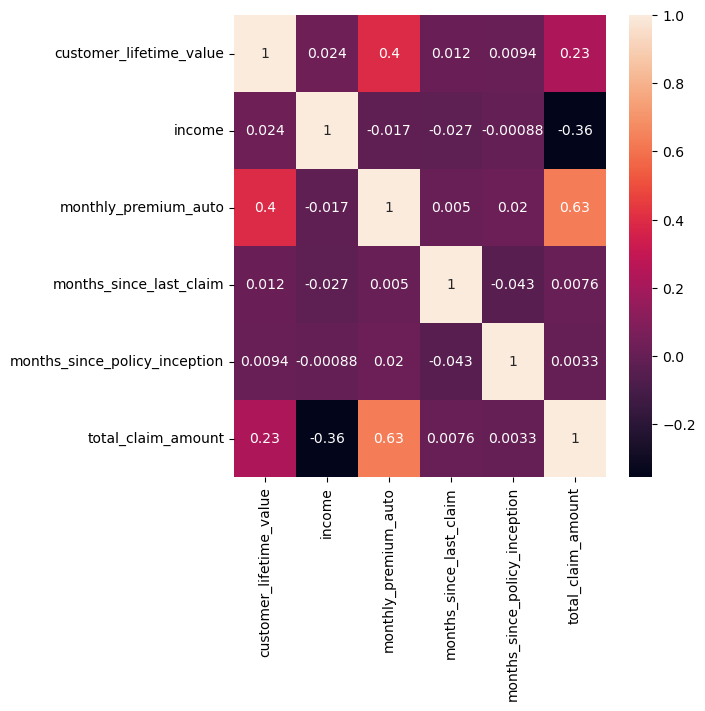

In [73]:
corr_matrix_num=pd.concat([X, y],axis=1).corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(corr_matrix_num, annot=True)
plt.show()

# Correlation plot of numeric columns and output variable - total_claim_amount

# Multicollinearity between input variables - An only, not-so-high correlation of 0.4 between CLV and monthly
# premium auto can be spotted from the heatmap, but they aren't that high for rejecting them for model building, until
# very low or negative correlation is identified between input and output variable. 
# High correlations of input variables with output were spotted (CLV, monthly_premium_auto).

In [74]:
#8. Plot a correlation matrix - categorical columns with output variable

# Scaling categorical data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(discrete_df)
encoded = encoder.transform(discrete_df).toarray()
cols = encoder.get_feature_names_out(input_features=discrete_df.columns)
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


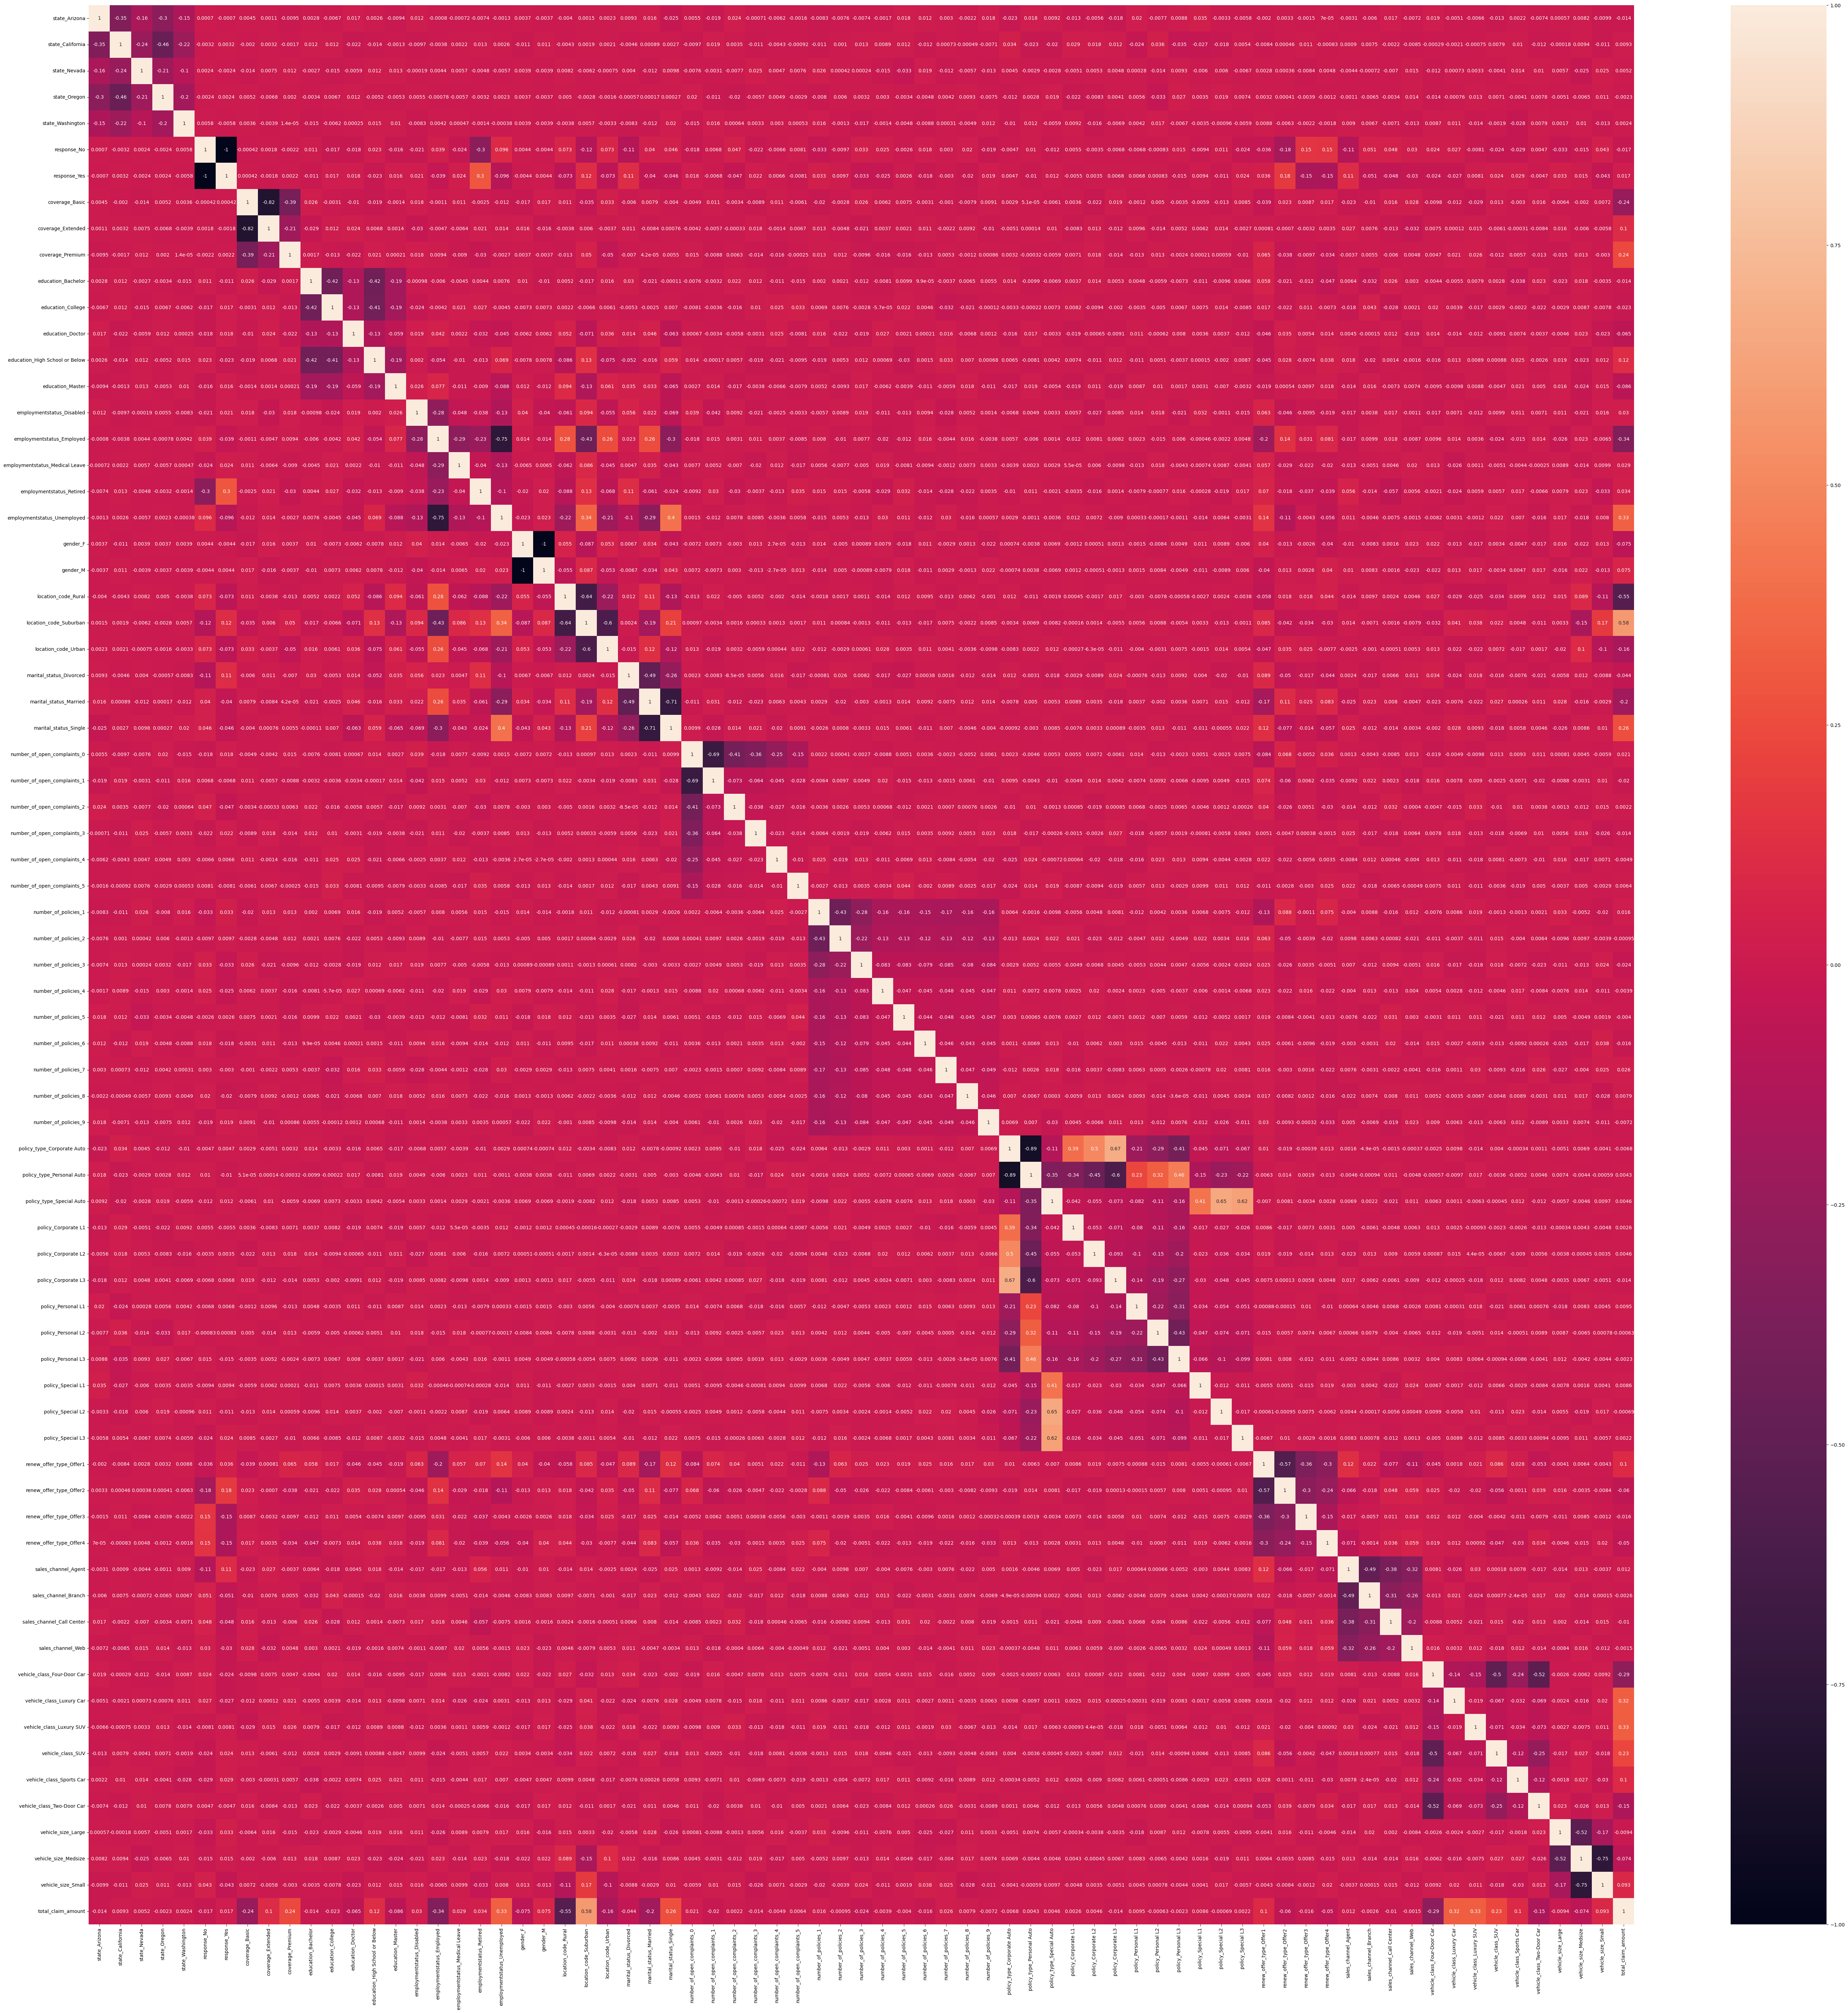

In [75]:
corr_matrix_cat=pd.concat([onehot_encoded, y],axis=1).corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(72, 72))
ax = sns.heatmap(corr_matrix_cat, annot=True)
plt.show()

# Correlation plot of categorical columns and output variable - total_claim_amount

# High multicollinearity of more than 0.9 between input variables weren't spotted.

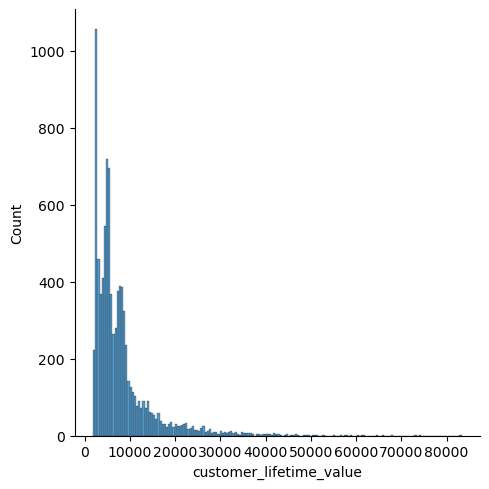

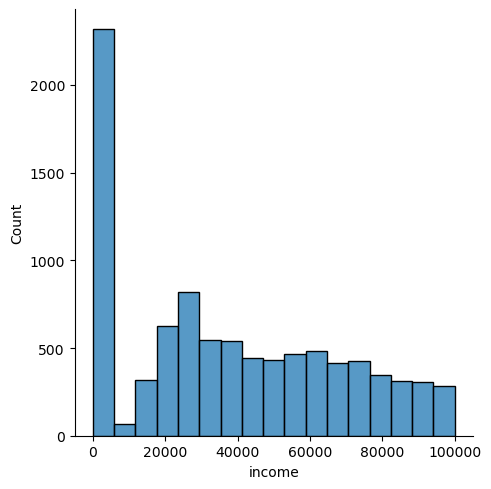

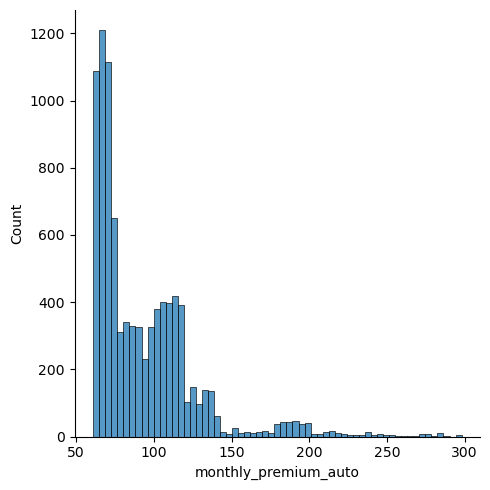

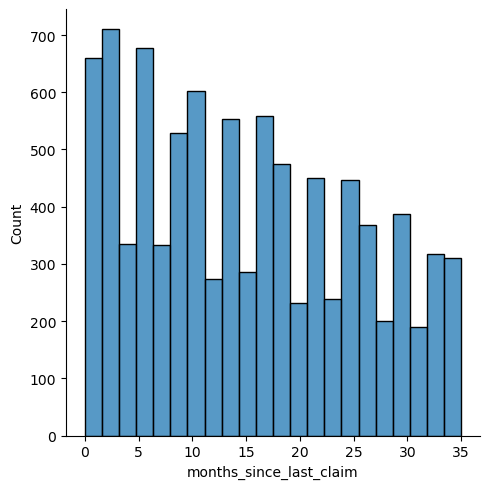

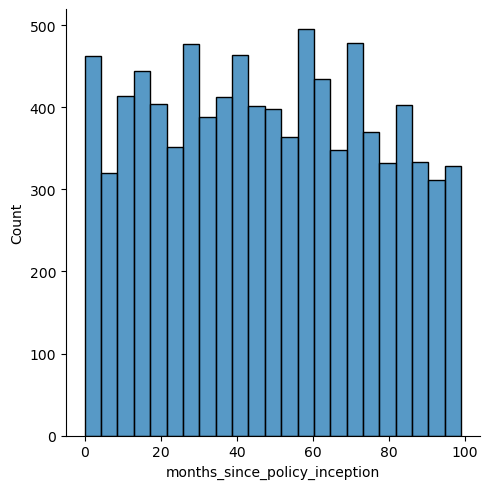

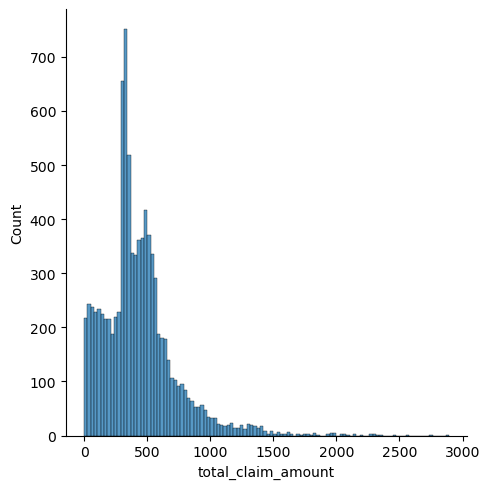

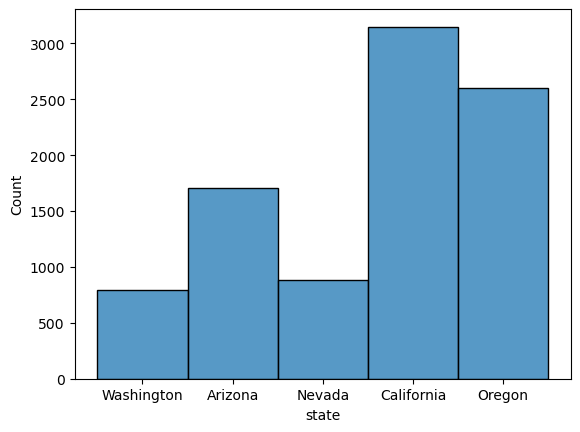

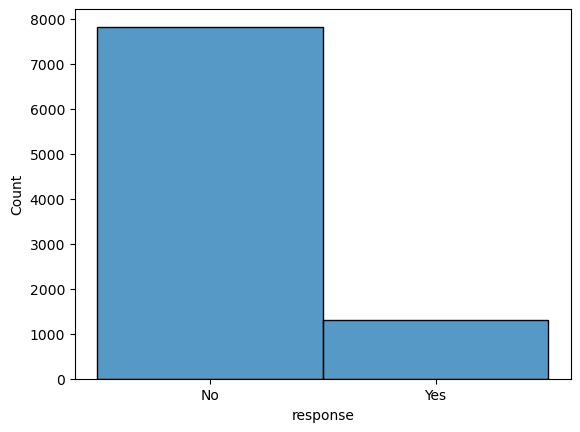

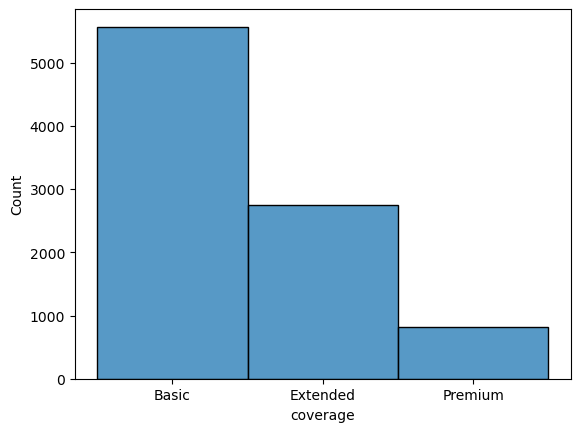

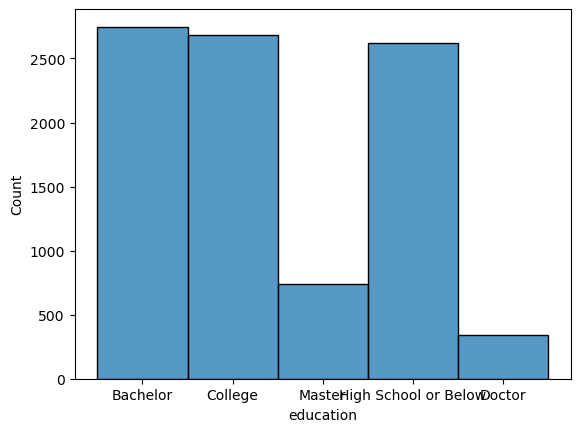

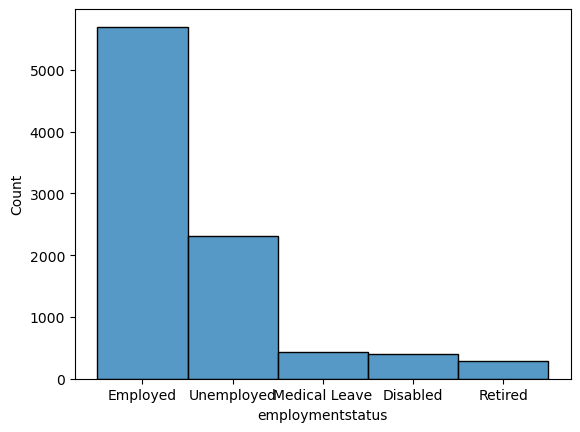

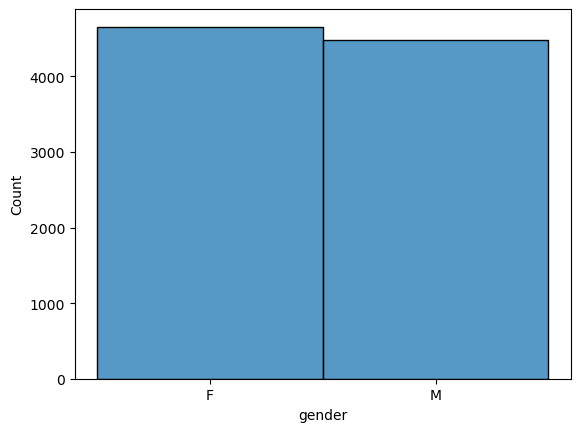

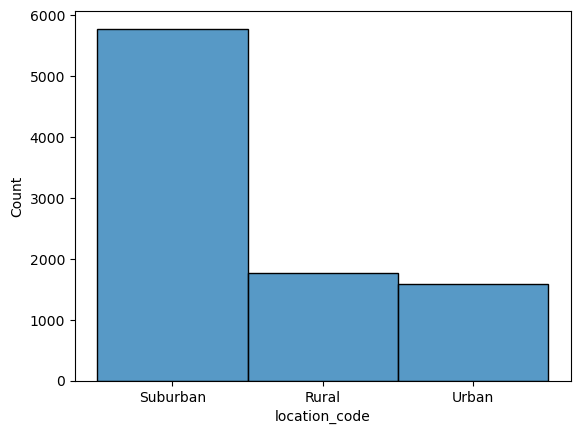

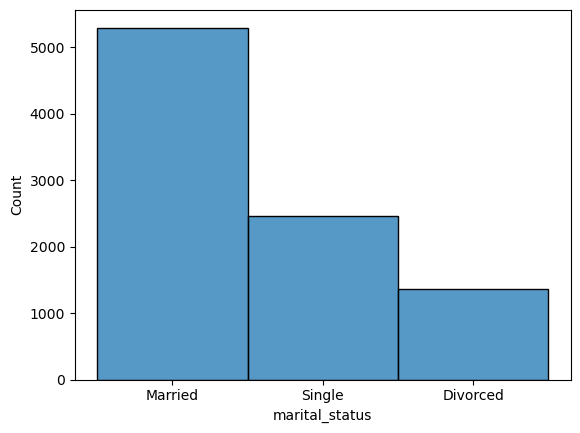

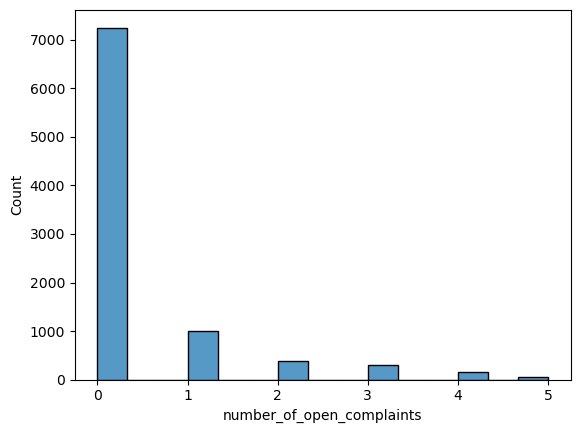

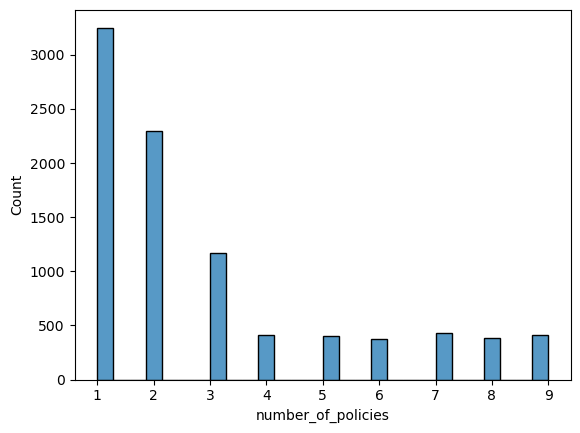

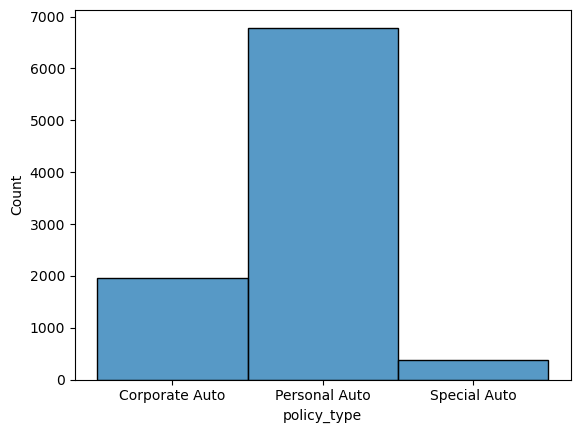

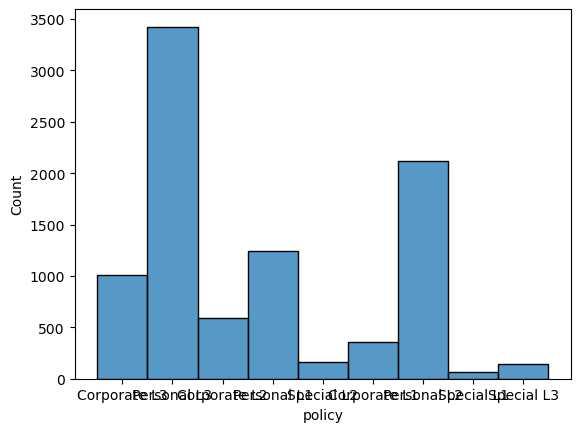

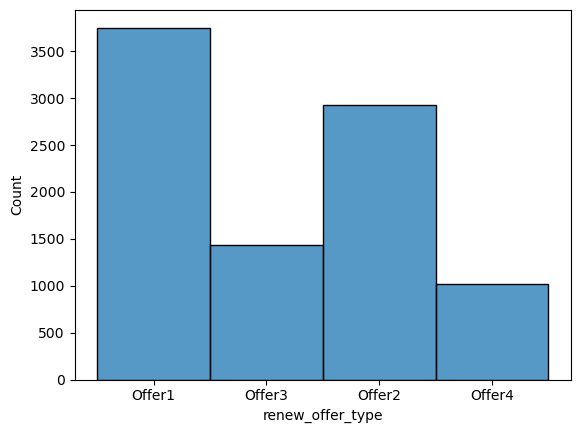

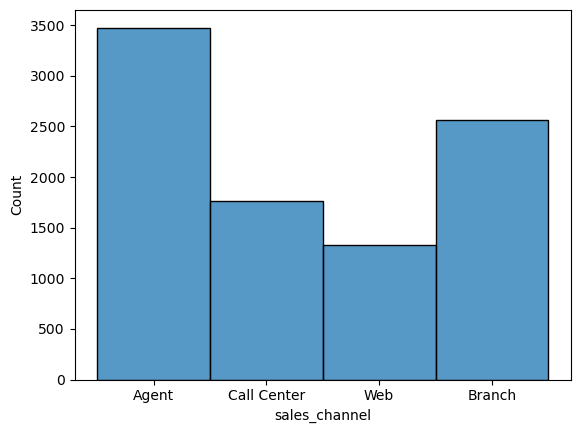

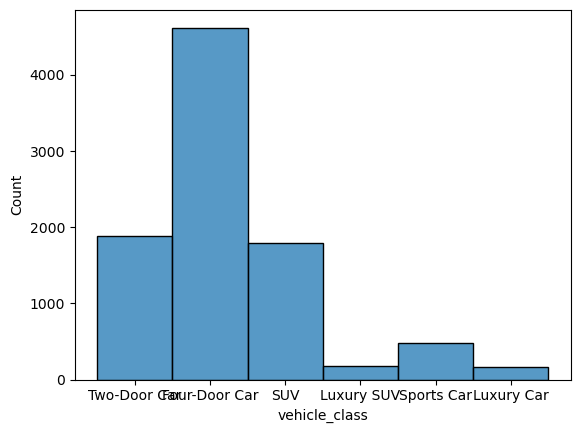

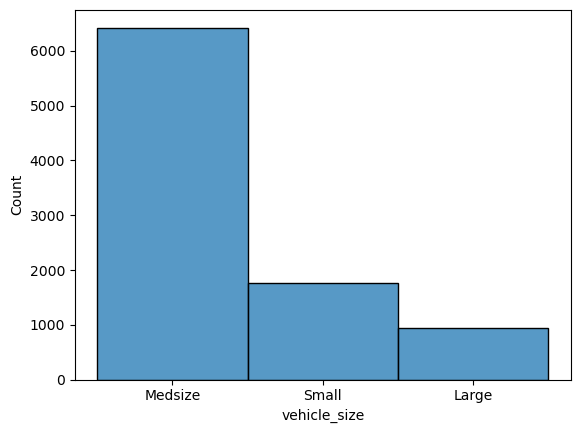

In [76]:
#9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need 
# to change the plot type to one better suited for continuous data!)

def plot_num_cols(df):
    X_num=df.select_dtypes(include=np.number)
    
    for col in X_num.columns:
        sns.displot(X_num[col],kind='hist')
        plt.show()

def plot_cat_cols(df):
    X_cat=df.select_dtypes(include=object)
    
    for col in X_cat.columns:
        sns.histplot(X_cat[col])
        plt.show()
continuous_df,discrete_df=segregate_num_cat_df(customer_df)
plot_num_cols(continuous_df)
plot_cat_cols(discrete_df)

In [77]:
# 10. Comment what you can see in the plots.

+ CLV,income,monthly_premium_auto, total_claim_amount: right-skewed, basically due to dominant income ranges. 
+ Income and monthly_premium_auto have 2 camel humps due to 2 dominant income ranges - low and medium.
+ months_since_last_claim,months_since_policy_inception have regular drops in counts maybe due to specific periodic constraints.
+ state - predominantly California and Oregon
+ coverage - predominantly Basic coverage being popular due to low premium
+ education - masters and doctorate are less popular as they're high level studies among vehicle owners
+ employmentstatus - predominantly employed people apply for vehicle insurance
+ gender - interestingly equal distribution with females having an edge over males
+ location - suburban areas are predominant subscribers for insurance, maybe due to their location, as suburb areas have higher chances of theft.
+ marital status - married people are major subscribers, maybe because they believe more in settlement and in security of all valuables.
+ num of open complaints - very low number of open complaints, which is good.
+ num of policies - single policy owners are most common
+ policy type - personal auto as the most common
+ sales channel - Agent is most popular - physical and direct marketing is more popular than web due to influencial power over the customer
+ vehicle class - 4 door car, which is obvious car everywhere is most common for insurance owners.
+ vehicle size - mid size, which again is an obvious choice among most owners

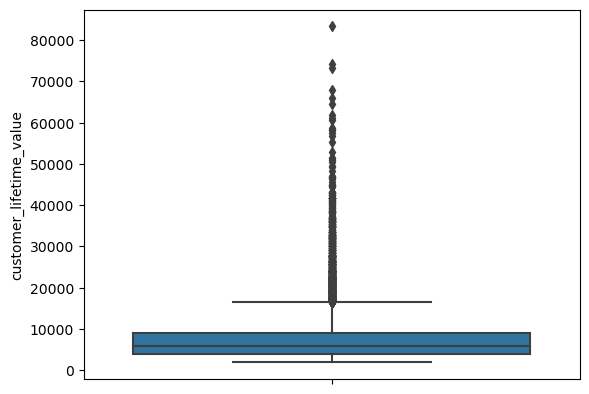

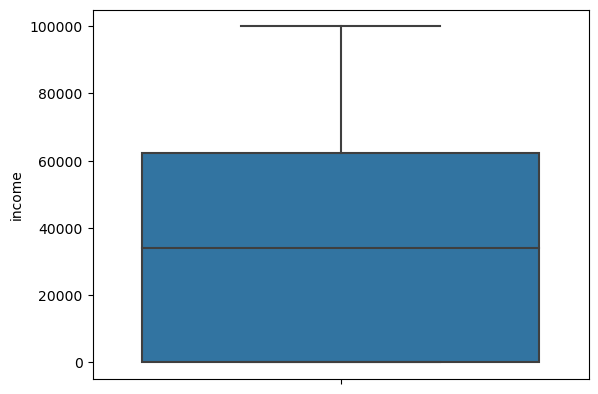

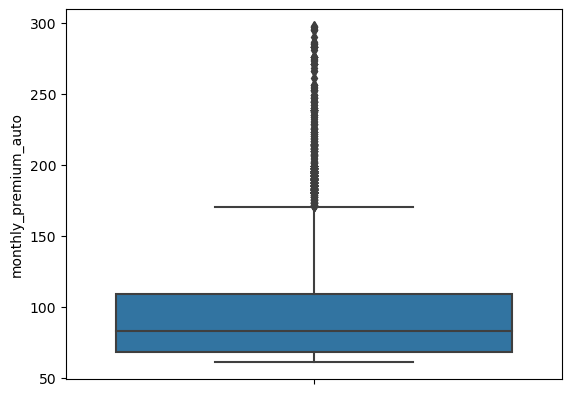

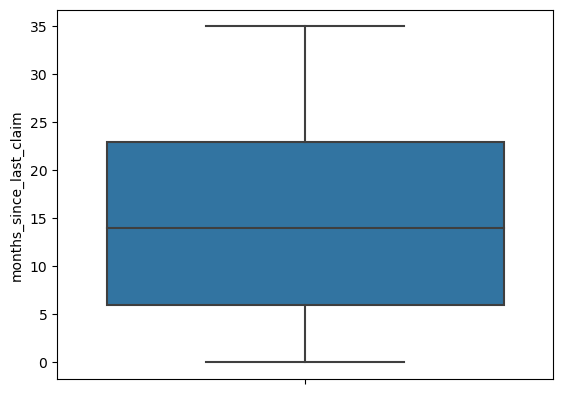

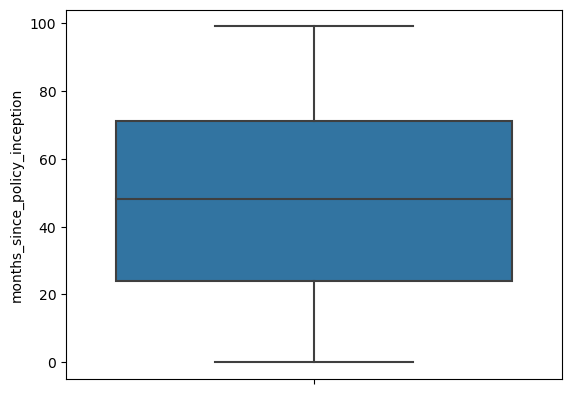

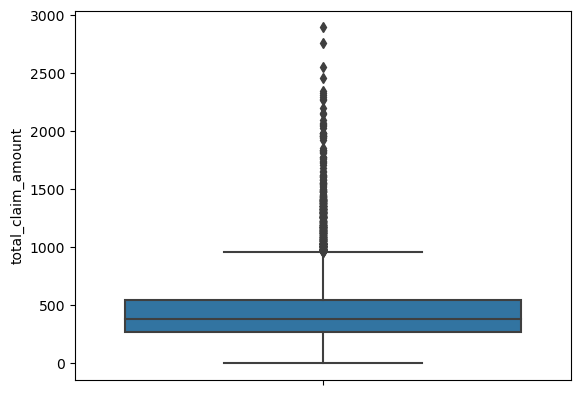

In [78]:
#11. Look for outliers in the continuous variables

for col in continuous_df.columns:
    sns.boxplot(y=continuous_df[col])
    plt.show()

In [79]:
#12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.

# CLV - has few outliers above 70000 : 3 rows
# total_claim_amount - outliers exist above 2600 : 2 rows

# As they are only countable number of rows, they can be removed safely without impacting the model building.

customer_df=customer_df[customer_df['customer_lifetime_value']<70000]
customer_df=customer_df[customer_df['total_claim_amount']<2600]

In [80]:
#13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

customer_df.isna().sum()/len(customer_df)

# No NaNs are there, so hurray!

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [81]:
#14. Save the numerical_df to csv as numerical.csv
customer_df.to_csv("numerical.csv",index=False)